# Историческая справка и получение данных с сайта yahoo.finance
Важнейшим фондовым индексом Германии является Франкфуртская биржа с индексом DAX. Биржа была основана в 1585 при принятии торговцами единных обменных курсов валют. В 1988 году был представлен индекс DAX, который представлял собой список ведущих 30 компаний Германии. На данный момент на бирже насчитывается 40 акций (у нас представлены сведения о 38 акциях). Наиболее популярными акциями на бирже являются: Adidas, BMW, Airbus, Porsche, Puma, Volkswagen Group, Mercedes-Benz Group.
На конец 2018 года на немецком фондовом рынке, в частности на Франкфуртской бирже (Frankfurter Wertpapierbörse), насчитывалось более 1,5 тысяч акций и несколько тысяч других финансовых инструментов, включая облигации, фонды и производные инструменты.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

dax_tickers = ["1COV.DE", "ADS.DE", "AIR.DE", "ALV.DE", "BAS.DE", "BAYN.DE", "BEI.DE", "BNR.DE", "BMW.DE", "CON.DE",
               "DBK.DE", "DB1.DE", "DTE.DE", "DHL.DE", "EOAN.DE", "FRE.DE", "FME.DE", "IFX.DE", "HEI.DE", "HEN3.DE",
               "HFG.DE", "HNR1.DE", "LIN.DE", "MBG.DE", "MRK.DE", "MTX.DE", "MUV2.DE", "RWE.DE", "SAP.DE", "SIE.DE",
               "SRT3.DE", "SHL.DE","SY1.DE", "PAH3.DE", "PUM.DE", "QIA.DE", "VNA.DE", "VOW3.DE",
               ]

data_frames = []

for ticker in dax_tickers:
    data = yf.download(ticker, start="2018-01-01", end="2018-12-31")
    data['Ticker'] = ticker
    data_frames.append(data[['Open', 'High', 'Low', 'Close', 'Ticker']])

all_data = pd.concat(data_frames)

all_data.reset_index(inplace=True)

all_data = all_data[['Date', 'Open', 'High', 'Low', 'Close', 'Ticker']]

print(all_data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

           Date        Open        High         Low       Close   Ticker
0    2018-01-02   86.139999   86.379997   84.620003   85.639999  1COV.DE
1    2018-01-03   85.739998   87.180000   85.440002   86.760002  1COV.DE
2    2018-01-04   87.400002   88.839996   87.339996   88.419998  1COV.DE
3    2018-01-05   88.400002   89.000000   87.279999   88.300003  1COV.DE
4    2018-01-08   88.300003   88.879997   87.120003   87.199997  1COV.DE
5    2018-01-09   87.180000   88.400002   86.800003   88.320000  1COV.DE
6    2018-01-10   88.199997   89.040001   87.580002   88.459999  1COV.DE
7    2018-01-11   87.099998   88.559998   87.019997   88.519997  1COV.DE
8    2018-01-12   88.980003   91.260002   88.480003   90.760002  1COV.DE
9    2018-01-15   91.099998   92.400002   90.699997   92.000000  1COV.DE
10   2018-01-16   92.820000   92.820000   91.320000   92.180000  1COV.DE
11   2018-01-17   92.599998   93.419998   92.059998   93.220001  1COV.DE
12   2018-01-18   93.660004   94.360001   93.059998

# Преобразование данных в данные по доходности

In [ ]:
all_data['Log_Return'] = np.where(
    all_data['Ticker'] == all_data['Ticker'].shift(1),
    np.log(all_data['Close'] / all_data['Close'].shift(1)),
    np.nan
)
data = all_data[['Date', 'Close', 'Log_Return', 'Ticker']]

print(data)


           Date       Close  Log_Return   Ticker
0    2018-01-02   85.639999         NaN  1COV.DE
1    2018-01-03   86.760002    0.012993  1COV.DE
2    2018-01-04   88.419998    0.018952  1COV.DE
3    2018-01-05   88.300003   -0.001358  1COV.DE
4    2018-01-08   87.199997   -0.012536  1COV.DE
5    2018-01-09   88.320000    0.012762  1COV.DE
6    2018-01-10   88.459999    0.001584  1COV.DE
7    2018-01-11   88.519997    0.000678  1COV.DE
8    2018-01-12   90.760002    0.024990  1COV.DE
9    2018-01-15   92.000000    0.013570  1COV.DE
10   2018-01-16   92.180000    0.001955  1COV.DE
11   2018-01-17   93.220001    0.011219  1COV.DE
12   2018-01-18   93.440002    0.002357  1COV.DE
13   2018-01-19   95.000000    0.016557  1COV.DE
14   2018-01-22   93.599998   -0.014847  1COV.DE
15   2018-01-23   93.480003   -0.001283  1COV.DE
16   2018-01-24   93.160004   -0.003429  1COV.DE
17   2018-01-25   94.000000    0.008976  1COV.DE
18   2018-01-26   94.199997    0.002125  1COV.DE
19   2018-01-29   94

# Вычисление оценки ожидаемых доходностей и стандартных отклонений

In [ ]:
summary_stats = data.groupby('Ticker')['Log_Return'].agg(['mean', 'std']).reset_index()

pd.options.display.float_format = '{:.6f}'.format

print(summary_stats)



     Ticker      mean      std
0   1COV.DE -0.002728 0.021743
1    ADS.DE  0.000348 0.017649
2    AIR.DE  0.000033 0.017028
3    ALV.DE -0.000381 0.011819
4    BAS.DE -0.001646 0.012608
5   BAYN.DE -0.002044 0.018226
6    BEI.DE -0.000214 0.010586
7    BMW.DE -0.000799 0.012859
8    BNR.DE -0.001333 0.013200
9    CON.DE -0.002480 0.019019
10   DB1.DE  0.000361 0.012368
11   DBK.DE -0.003302 0.020542
12   DHL.DE -0.002034 0.014174
13   DTE.DE -0.000001 0.010716
14  EOAN.DE -0.000203 0.013293
15   FME.DE -0.001707 0.019975
16   FRE.DE -0.001665 0.022394
17   HEI.DE -0.002081 0.014160
18  HEN3.DE -0.000529 0.011491
19   HFG.DE -0.002656 0.024208
20  HNR1.DE  0.000440 0.010736
21   IFX.DE -0.001135 0.020561
22   LIN.DE  0.002395 0.042285
23   MBG.DE -0.001716 0.014179
24   MRK.DE  0.000000 0.014218
25   MTX.DE  0.000236 0.017000
26  MUV2.DE  0.000222 0.011286
27  PAH3.DE -0.001198 0.017476
28   PUM.DE  0.000680 0.024224
29   QIA.DE  0.000538 0.013614
30   RWE.DE  0.000366 0.017878
31   SAP

# Нахождение Парето оптимальных активов


In [ ]:
lst = []
for index, row in summary_stats.iterrows():
  if (row['mean'] > 0):
    r = [row['Ticker'], float(row['std']), float(row['mean'])]
    lst.append(r)
lst = np.array(lst)

pareto = []
for name, x, y in lst:
  ok = True
  for _, i, j in lst:
    if (float(i) < float(x) and float(j) > float(y)):
      ok = False
  if (ok):
    pareto.append([name, x, y])

print(pareto)

[['HNR1.DE', '0.010735853981607896', '0.000439746365552458'], ['LIN.DE', '0.04228504355499387', '0.0023945195993787215'], ['SHL.DE', '0.013487103651349504', '0.0006565959180492529'], ['SRT3.DE', '0.022156273473188756', '0.001221235640865759']]


# Построение карты активов


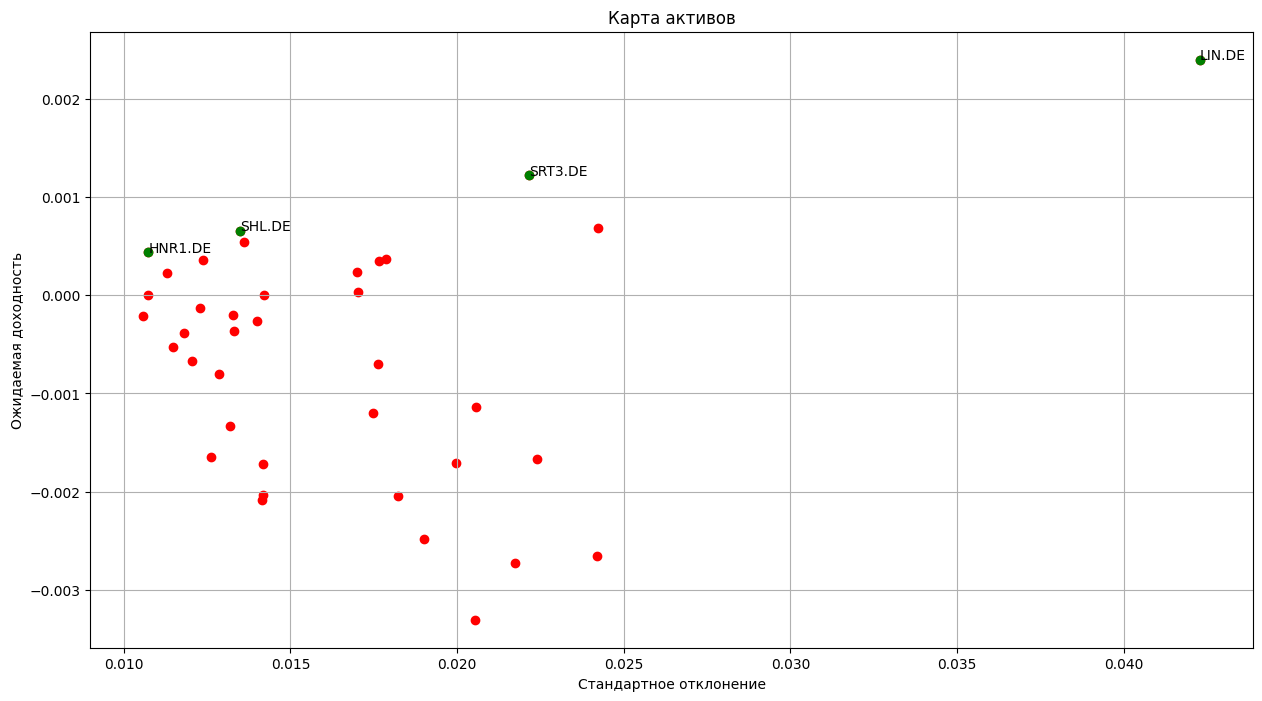

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(summary_stats['std'], summary_stats['mean'], color = "red")
for name, x, y in pareto:
  plt.scatter(float(x), float(y), color = "green")
  plt.text(float(x), float(y), name)


plt.title('Карта активов')
plt.xlabel('Стандартное отклонение')
plt.ylabel('Ожидаемая доходность')

plt.grid()

plt.show()

# Оценивание VaR


In [ ]:
confidence_level = 0.95
k = norm.ppf(confidence_level) #Значение для уровня значимости 95%

summary_stats = pd.DataFrame(pareto, columns=['Name', 'std', 'mean'])
summary_stats['std'] = pd.to_numeric(summary_stats['std'])
summary_stats['mean'] = pd.to_numeric(summary_stats['mean'])

summary_stats['VaR'] = k * summary_stats['std'] - summary_stats['mean']

min_var = summary_stats.loc[summary_stats['VaR'].idxmin()]
print("Наиболее предпочтительный актив по VaR:")
print(min_var)


Наиболее предпочтительный актив по VaR:
Name    HNR1.DE
std    0.010736
mean   0.000440
VaR    0.017219
Name: 0, dtype: object


# Оценивание CVaR


In [ ]:
confidence_level = 0.95
k = norm.ppf(confidence_level)

summary_stats['CVaR'] = (summary_stats['std'] * (norm.pdf(k) / (1 - confidence_level)) - summary_stats['mean'])

min_cvar = summary_stats.loc[summary_stats['CVaR'].idxmin()]
print("Наиболее предпочтительный актив по CVaR:")
print(min_cvar)

Наиболее предпочтительный актив по CVaR:
Name    HNR1.DE
std    0.010736
mean   0.000440
VaR    0.017219
CVaR   0.021705
Name: 0, dtype: object


# Проверка доходности парето-оптимальных активов на повторную выборку

In [ ]:
INV_MIN = 14783
INV_MAX = 14862

def get_inv_count(X, N):
  inv_count = 0

  for i in range(N - 1):
    for j in range(i + 1, N):
      inv_count += 1 if (X[i] > X[j]) else 0

  return (inv_count > INV_MIN) and (inv_count <= INV_MAX)


for ticker, _, _ in pareto:
  ticker_data = np.array(data[data['Ticker'] == ticker]['Log_Return'].dropna())
  print(f'{ticker}: {get_inv_count(ticker_data, len(ticker_data))}')

HNR1.DE: False
LIN.DE: False
SHL.DE: False
SRT3.DE: False


Гипотеза случайности отвергается для всех рассматриваемых активов, следовательно выборку нельзя считать повторной.*

# Исследования распределения доходностей некоторых акций

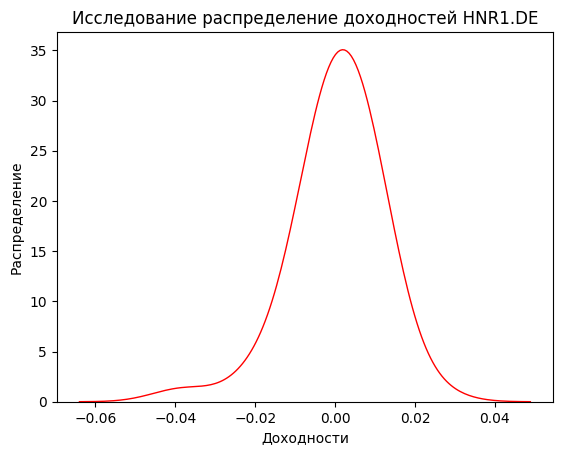

In [ ]:
plt.figure()
ticker_data = data[data['Ticker'] == 'HNR1.DE']['Log_Return'].dropna()
sns.kdeplot(ticker_data, color='red', lw=1, bw_adjust=2)

plt.title('Исследование распределение доходностей HNR1.DE')
plt.xlabel('Доходности')
plt.ylabel('Распределение')

plt.show()


Можно заметить, что распределение похоже на нормальное

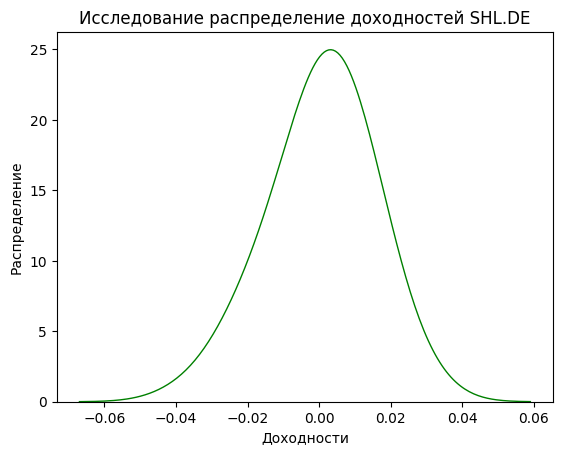

In [ ]:
plt.figure()
ticker_data = data[data['Ticker'] == 'SHL.DE']['Log_Return'].dropna()
sns.kdeplot(ticker_data, color='green', lw=1, bw_adjust=2)

plt.title('Исследование распределение доходностей SHL.DE')
plt.xlabel('Доходности')
plt.ylabel('Распределение')

plt.show()

Можно заметить, что распределение похоже на нормальное

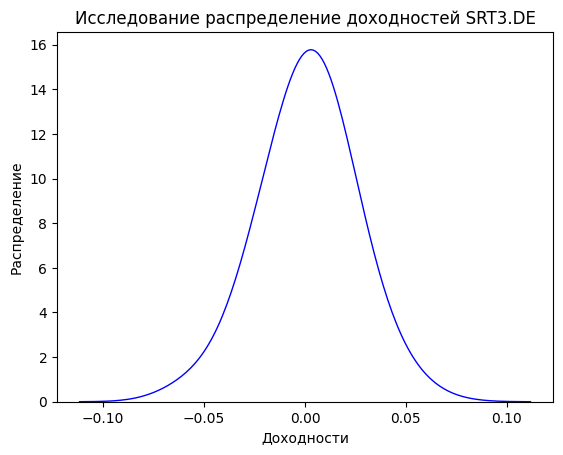

In [ ]:
plt.figure()
ticker_data = data[data['Ticker'] == 'SRT3.DE']['Log_Return'].dropna()
sns.kdeplot(ticker_data, color='blue', lw=1, bw_adjust=2)

plt.title('Исследование распределение доходностей SRT3.DE')
plt.xlabel('Доходности')
plt.ylabel('Распределение')

plt.show()

Можно заметить, что распределение напоминает нормальное.

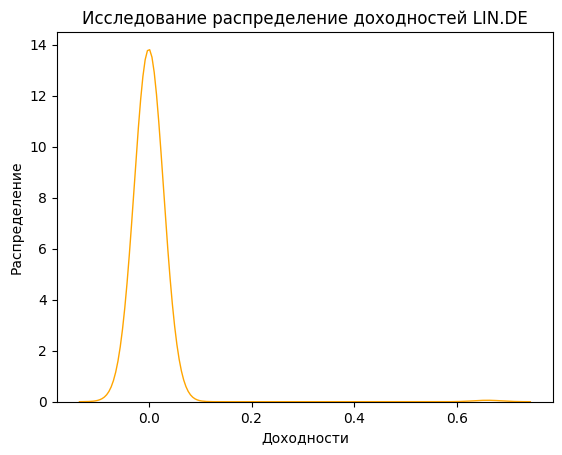

In [ ]:
plt.figure()
ticker_data = data[data['Ticker'] == 'LIN.DE']['Log_Return'].dropna()
sns.kdeplot(ticker_data, color='orange', lw=1, bw_adjust=2)

plt.title('Исследование распределение доходностей LIN.DE')
plt.xlabel('Доходности')
plt.ylabel('Распределение')

plt.show()

# Резкий скачок доходности индекса LIN.DE из-за возобновившихся торогов акцией спустя 7 лет

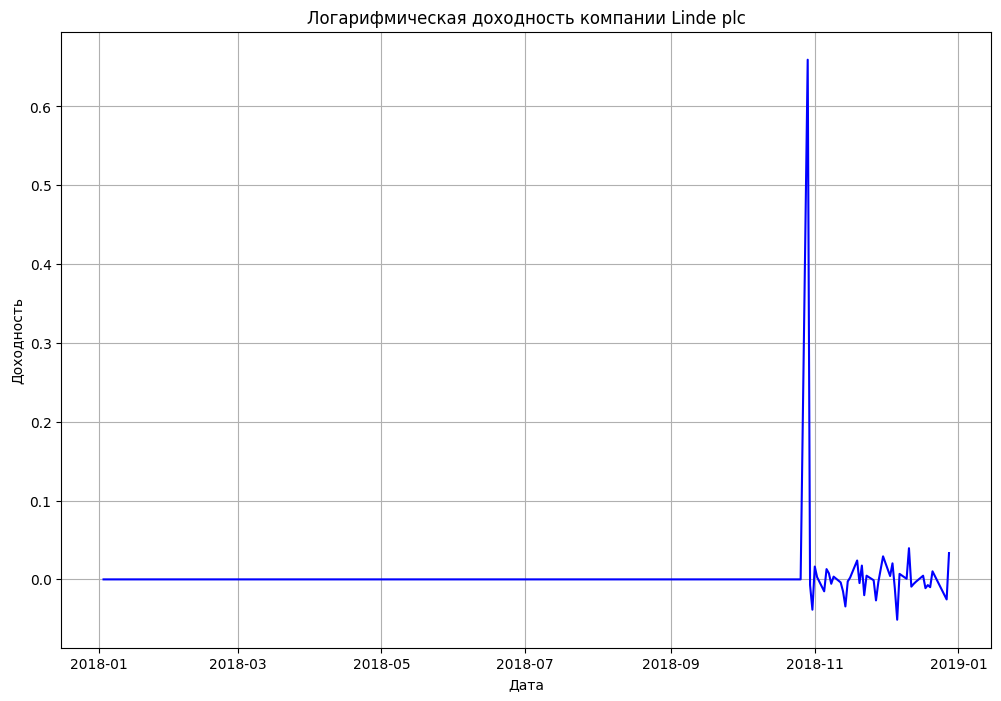

In [ ]:
ticker_data = data[data['Ticker'] == 'LIN.DE']

plt.figure(figsize=(12, 8))

plt.plot(ticker_data['Date'], ticker_data['Log_Return'], color='blue')

plt.title('Логарифмическая доходность компании Linde plc')
plt.xlabel('Дата')
plt.ylabel('Доходность')

plt.grid()